<a href="https://colab.research.google.com/github/khaterehsm/salary-prediction/blob/main/Salary_prediction_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inrtoduction & Problem definition**
The goal is to predict job salaries based on different characteristics like job title, rating, location, and ... .


## **Importing libraries & Loading data**
 In this section, import the necessary libraries for data analysis and load the data from CSV file. This data includes job-related information and salaries that will be used for training the model.

In [1]:
# Load the dataset from CSV file
from google.colab import files

In [2]:
uploaded = files.upload()

Saving df.csv to df.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
import pickle

# **Exploring** **the Dataset**

In [4]:
df=pd.read_csv('df.csv')

In [5]:
# Display the first 5 rows of the dataset for quick inspection
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [7]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Sample values: {df[col].unique()[:5]}")


Column: Job Title
Unique values: 2959
Sample values: ['Senior Data Scientist' 'Data Scientist, Product Analytics'
 'Data Science Manager' 'Data Analyst' 'Director, Data Science']

Column: Salary Estimate
Unique values: 1321
Sample values: ['$111K-$181K (Glassdoor est.)' '$120K-$140K (Glassdoor est.)'
 '$119K-$147K (Glassdoor est.)' '$74K-$124K (Glassdoor est.)'
 '$102K-$121K (Glassdoor est.)']

Column: Rating
Unique values: 38
Sample values: [ 3.5  4.5 -1.   3.4  2.9]

Column: Company Name
Unique values: 3279
Sample values: ['Hopper\n3.5' 'Noom US\n4.5' 'Decode_M' 'Sapphire Digital\n3.4'
 'United Entertainment Group\n3.4']

Column: Location
Unique values: 545
Sample values: ['New York, NY' 'Lyndhurst, NJ' 'Brooklyn, NY' 'Jersey City, NJ'
 'Carle Place, NY']

Column: Size
Unique values: 16
Sample values: ['501 to 1000 employees' '1001 to 5000 employees' '1 to 50 employees'
 '201 to 500 employees' '51 to 200 employees']

Column: Founded
Unique values: 204
Sample values: ['2007' '2008' '

# **Data cleaning & Prepocessing**

*   Removing invalid values such as -1 from the salary estimate column
*   Extracting minimum and maximum salary from the salary column
*   Extracting the state from the location column
*   converting the data into the appropriate type for model training




In [8]:
# Remove -1 from the salary estimate column (invalid data)
df = df[df['Salary Estimate'] != '-1']

In [9]:
# Remove some extra characters and convert salary estimate to numeric values
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [10]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$', ' '))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K', ' '))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())

In [114]:
# Extract minimum and maximum salary from the 'Salary Estimate' column
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[2])

# Convert salary columns to integer type
df['Min_salary'] = df['Min_salary'].astype(int)
df['Max_salary']=df['Max_salary'].astype(int)

# Calculate the average salary
df['Average_salary'] = (df.Min_salary + df.Max_salary)/2

In [115]:
# Extract the state from the 'Location' column
df['State'] = df['Location'].apply(lambda x: x.split()[-1])

# Remove rows where the state is 'Kingdom' (assuming this is an outlier or irrelevant)
df = df[df.State != 'Kingdom']

In [13]:
def title_organizer(x):
        """
        This function organizes the job title
        """
        x = x.lower()
        if ('data scientist' in x) or ('data science' in x) :
            return 'data scientist'
        elif 'data engineer' in x:
            return 'data engineer'
        elif 'analyst' in x:
            return 'analyst'
        elif 'deep learning' in x:
            return 'deep learning engineer'
        elif 'machine learning' in x:
            return 'machine learning engineer'
        elif 'director' in x:
            return 'director'
        elif 'manager' in x:
            return 'manager'
        elif 'researcher' in x:
            return 'researcher'
        else:
            return 'others'

In [14]:
df['Job Title'] = df['Job Title'].apply(title_organizer)

In [15]:
df['Job Title'].value_counts()

,count
Job Title,
data scientist,1992
analyst,1184
others,1160
data engineer,858
machine learning engineer,177
manager,70
researcher,33
director,19
deep learning engineer,3


In [16]:
df.describe()

,Rating,Min_salary,Max_salary,Average_salary
count,5496.000000,5496.000000,5496.000000,5496.000000
mean,3.286754,79.154112,132.189592,105.671852
std,1.603051,31.304488,41.785880,35.493825
min,-1.000000,12.000000,44.000000,37.500000
25%,3.300000,54.000000,99.000000,77.000000
50%,3.800000,74.000000,129.000000,101.500000
75%,4.100000,98.000000,159.000000,130.000000
max,5.000000,200.000000,386.000000,268.000000


In [17]:
df = df[df['Rating']!=-1]

# **EDA** **&** **Visualization**
In thissection, the distribution of features, correlations between features,and patterns within the data are explored through various visualizations and analyses. This helps in identifying important features and improving the model.

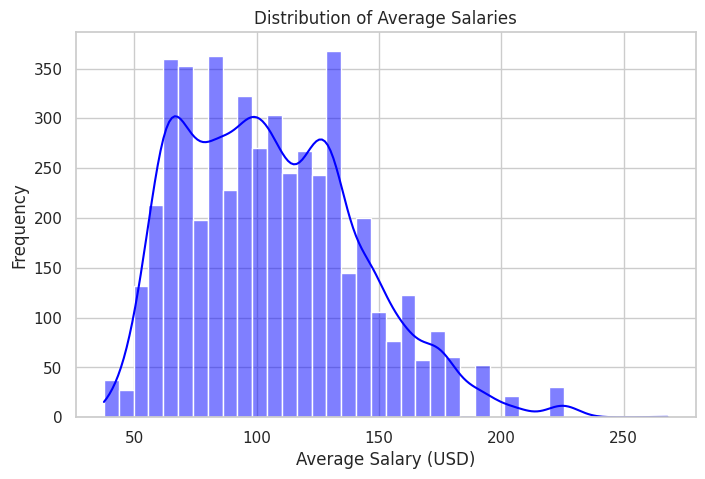

In [18]:
# Visualize and distribution of the average salary
plt.figure(figsize=(8,5))
sns.histplot(df['Average_salary'], kde=True, color='blue')
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Frequency')
plt.show()

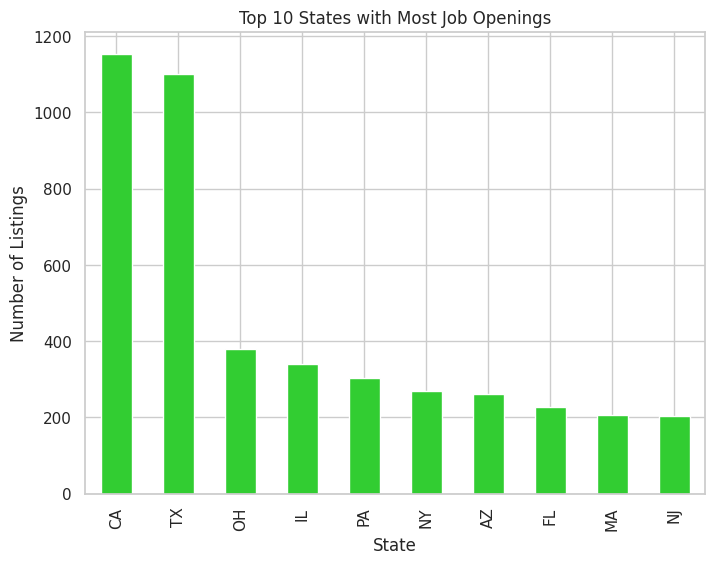

In [19]:
plt.figure(figsize=(8,6))
df['State'].value_counts().head(10).plot(kind='bar', color='limegreen')
plt.title('Top 10 States with Most Job Openings')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.show()

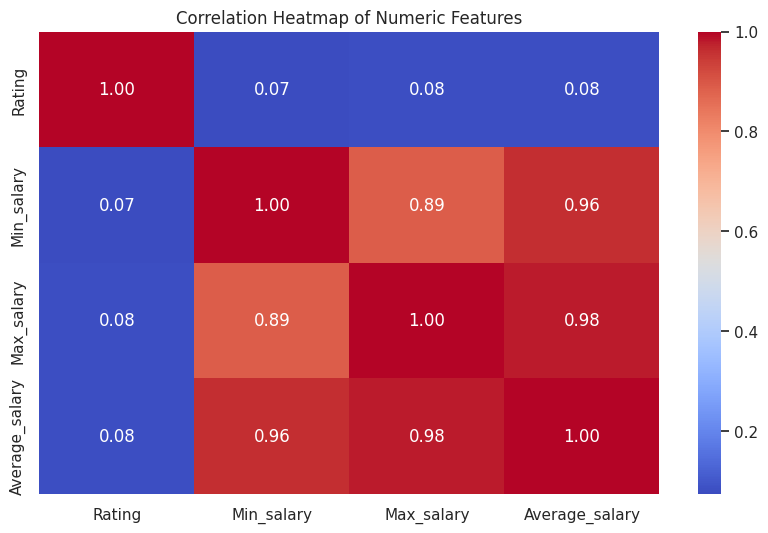

In [20]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [21]:
cleaned_df = df[['Job Title', 'Rating', 'Average_salary', 'State']]

In [22]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


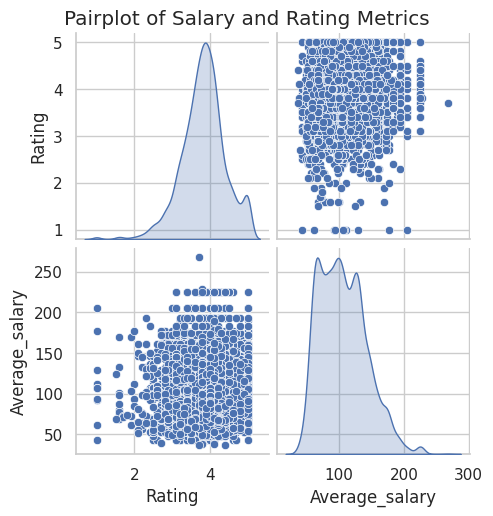

In [23]:
sns.pairplot(df[['Job Title', 'Rating', 'Average_salary', 'State']], diag_kind='kde')
plt.suptitle('Pairplot of Salary and Rating Metrics', y=1.02)
plt.show()

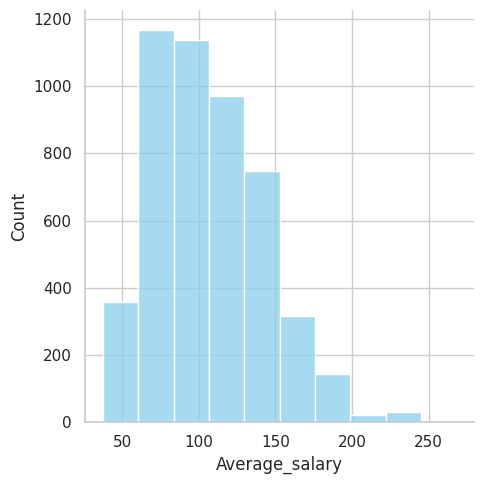

In [24]:
sns.displot(x='Average_salary', data= cleaned_df, bins = 10, color='skyblue')


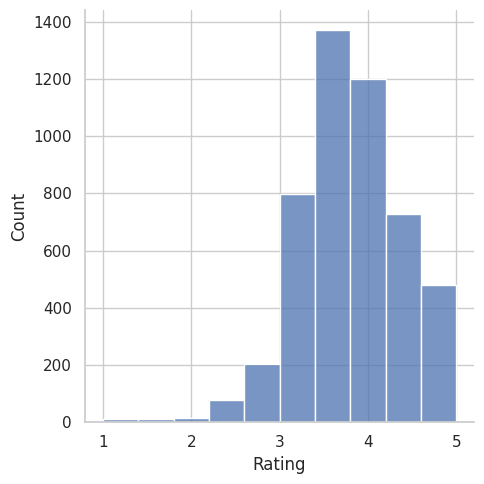

In [25]:
sns.displot(x='Rating', data= cleaned_df, bins = 10)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'data scientist'),
  Text(1, 0, 'analyst'),
  Text(2, 0, 'researcher'),
  Text(3, 0, 'others'),
  Text(4, 0, 'data engineer'),
  Text(5, 0, 'manager'),
  Text(6, 0, 'machine learning engineer'),
  Text(7, 0, 'director'),
  Text(8, 0, 'deep learning engineer')])

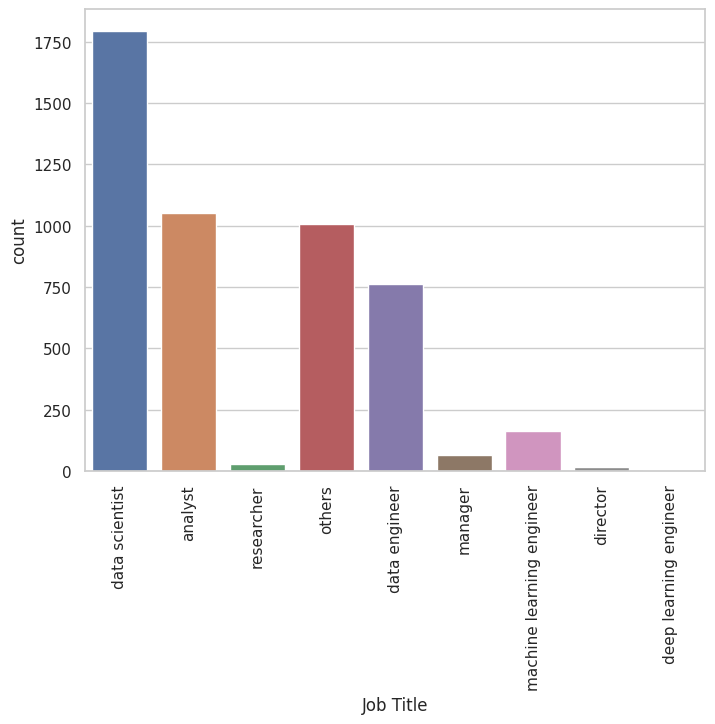

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='Job Title', data= cleaned_df,hue='Job Title')
plt.xticks(rotation= 90)

<Axes: xlabel='Rating', ylabel='Average_salary'>

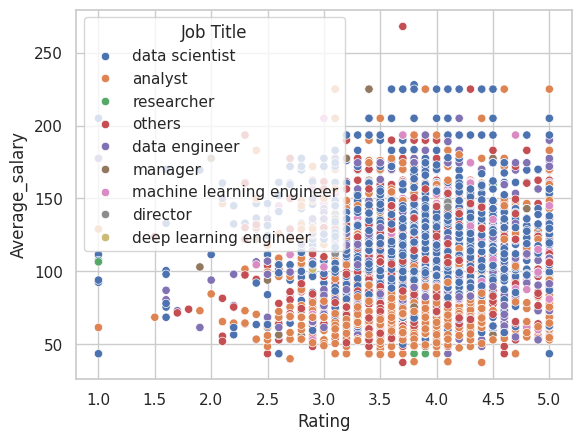

In [117]:
# Create a scatter plot to visualize the relationship between Rating and Average Salary, colored by Job Title
sns.scatterplot(x='Rating', y='Average_salary', data= cleaned_df, hue='Job Title')

In [118]:
from scipy.stats import ttest_ind

# Separate salaries for California and other states
california_salaries = df[df['State'] == 'CA']['Average_salary']
other_salaries = df[df['State'] != 'CA']['Average_salary']

# Perform an independent samples t-test to compare salaries between California and other states
t_stat, p_value = ttest_ind(california_salaries, other_salaries, equal_var=False)

# Print the t-statistic and p-value
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpret the results based on the p-value
if p_value < 0.05:
    print(" California salaries are higher.")
else:
    print(" No significant salary difference.")

T-Statistic: 26.393903010736775
P-Value: 8.302662799324228e-129
 California salaries are higher.


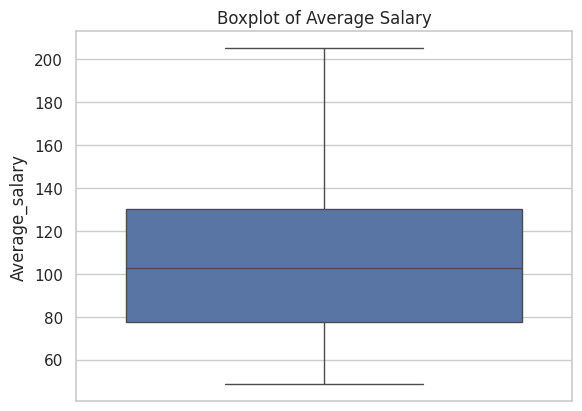

In [119]:
# Create a boxplot to visualize the distribution of Average Salary and identify potential outliers
sns.boxplot(df['Average_salary'])
plt.title("Boxplot of Average Salary")
plt.show()

In [30]:
q1 = df['Average_salary'].quantile(0.01)
q3 = df['Average_salary'].quantile(0.99)
df = df[(df['Average_salary'] >= q1) & (df['Average_salary'] <= q3)]

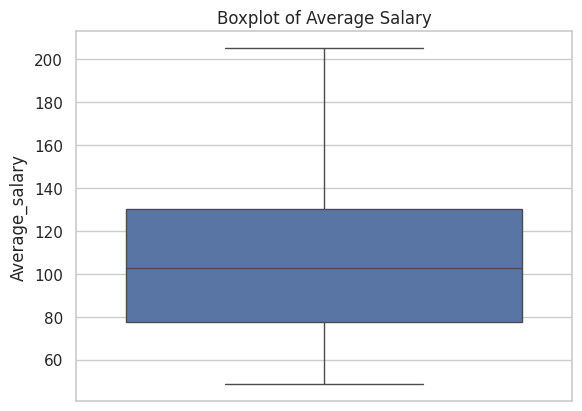

In [31]:
sns.boxplot(df['Average_salary'])
plt.title("Boxplot of Average Salary")
plt.show()

In [32]:
df_dum = pd.get_dummies(cleaned_df, columns=['Job Title','State'])

In [33]:
X = df_dum.drop(columns='Average_salary')

In [34]:
y = df_dum['Average_salary']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Modeling  & Evaluation**
In this step, various machine learning models (regression and classification) are used to predict salaries.




In [37]:
# initialize the linear regression model
lr = LinearRegression()

In [38]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [39]:
print(lr.intercept_)

105.31884798909338


In [40]:
print(lr.coef_)

[ 1.31615494 -3.60596725 -0.02539194  4.136033   -0.26865431 -0.02102769
  1.70406309 -1.23052716 -1.7827644   0.49061171 -1.15081199 10.87347742
 -0.02517955  2.46904024 -3.99680712 -0.3730623  -5.85301757 -0.56600066
 -0.38410475  0.52612687 -0.37956608 -0.48842361 -3.41857925 -0.45847877
 -0.13491589  1.0056455   0.15254667  5.3846596  -4.39872951 -1.80139172
 -2.78604605 -0.66213061 -0.72432663]


In [41]:
predictions = lr.predict(X_test_scaled)
predictions

array([ 93.04524525, 124.15876048,  90.02657703, ...,  83.26930902,
        91.69749809,  91.8285353 ])

In [45]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
predictions = lr.predict(X_test_scaled)

# Evaluate the model using Mean Absolute Error and Mean Squared Error
print('MAE on Test Set:', mean_absolute_error(y_test, predictions))
print('MSE on Test Set:', mean_squared_error(y_test, predictions))

MAE on Test Set: 23.695309942682623
MSE on Test Set: 918.2917613012352



# **Visualizing Linear Regression Results**
We can plot the actual vs. predicted salaries and the residuals to evaluate the linear regression model.

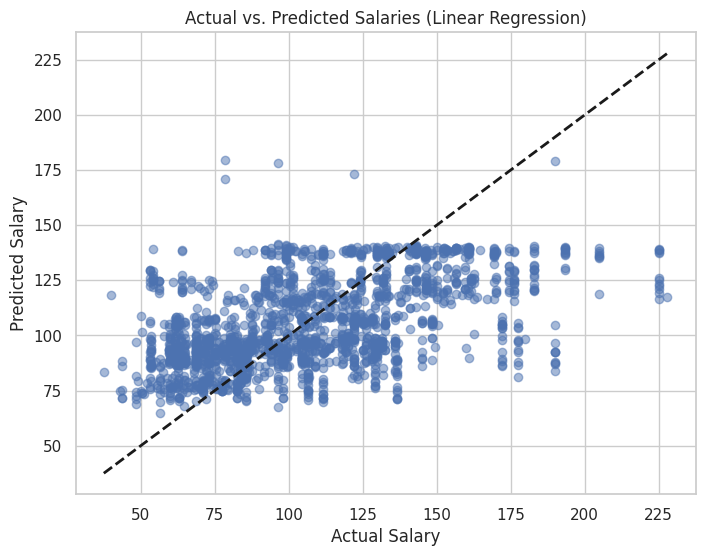

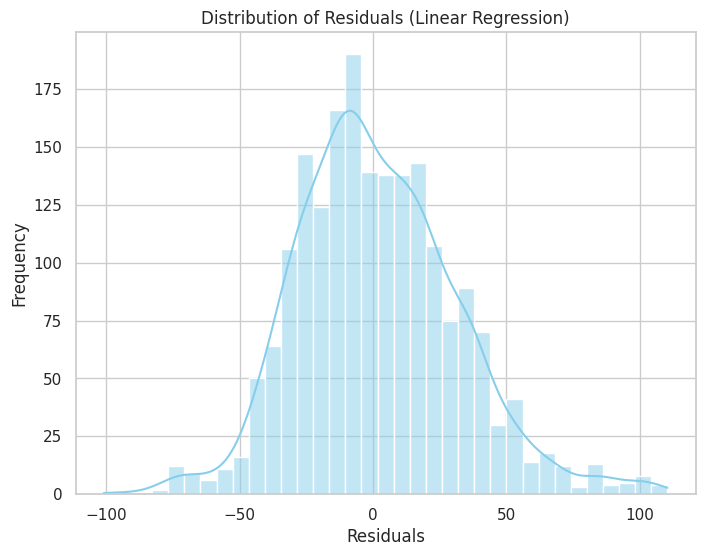

In [112]:
# Plotting actual vs. predicted salaries for the linear regression model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries (Linear Regression)')
plt.show()

# Plotting residuals for the linear regression model
plt.figure(figsize=(8, 6))
sns.histplot(residual, kde=True, color='skyblue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Linear Regression)')
plt.show()

In [47]:
# Calculate the residuals (the difference between actual and predicted salaries)
residual= y_test-predictions

In [51]:
pickle.dump(lr, open('Salary_Estimater.pkl' , 'wb'))

In [52]:
df_dum['Average_salary'].median()

102.0

In [53]:
def sat(x):
  if x>= 102:
    return(1)
  else:
    return(0)

In [116]:
# Create a 'Satisfaction' column based on whether the average salary is above or below the median
df_dum['Satisfaction'] = df_dum['Average_salary'].apply(sat)

In [55]:
df_dum['Satisfaction']

,Satisfaction
0,1
1,1
3,1
4,1
5,1
...,...
5881,0
5882,0
5883,0
5886,0


In [56]:
df_dum[['Average_salary', 'Satisfaction']]

,Average_salary,Satisfaction
0,146.0,1
1,146.0,1
3,146.0,1
4,146.0,1
5,146.0,1
...,...,...
5881,51.0,0
5882,68.0,0
5883,89.5,0
5886,89.0,0


In [57]:
X1 = df_dum.drop(columns=['Average_salary', 'Satisfaction'])

In [58]:
y1 = df_dum['Satisfaction']

In [59]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state = 101)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logreg = LogisticRegression()

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid_search_logreg = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_logreg, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_logreg.fit(X_train1, y_train1)

# Print the best parameters and best score
print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", grid_search_logreg.best_score_)

# Get the best model
best_logreg_model = grid_search_logreg.best_estimator_

Best parameters for Logistic Regression: {'C': 1}
Best cross-validation accuracy for Logistic Regression: 0.6950138728817177


In [64]:
prediction1 = grid_search_logreg.predict(X_test1)

In [65]:
prediction1

array([0, 1, 0, ..., 0, 1, 0])

In [66]:
y_test1

,Satisfaction
4607,0
3136,1
2694,0
4633,0
4490,1
...,...
5366,0
2080,0
3348,0
1996,0


In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test1,prediction1)

array([[521, 201],
       [232, 514]])

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test1,prediction1))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       722
           1       0.72      0.69      0.70       746

    accuracy                           0.71      1468
   macro avg       0.71      0.71      0.71      1468
weighted avg       0.71      0.71      0.71      1468



In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test1, prediction1)

0.7050408719346049

In [73]:
pickle.dump(logreg, open('SalarySatisfaction_Estimater.pkl' , 'wb'))

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
tree = DecisionTreeClassifier()

In [76]:
# Define the parameter grid for Decision Tree
param_grid_tree = {'max_depth': [None, 5, 10, 15, 20],
                   'min_samples_split': [2, 5, 10]}

# Create a GridSearchCV object
grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_tree, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_tree.fit(X_train1, y_train1)

# Print the best parameters and best score
print("Best parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best cross-validation accuracy for Decision Tree:", grid_search_tree.best_score_)

# Get the best model
best_tree_model = grid_search_tree.best_estimator_

Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
Best cross-validation accuracy for Decision Tree: 0.6716416954795748


In [78]:
predict_tree = best_tree_model.predict(X_test1)

In [79]:
confusion_matrix(y_test1,predict_tree)

array([[602, 120],
       [356, 390]])

In [80]:
accuracy_score(y_test1,predict_tree)

0.6757493188010899

In [81]:
print(classification_report(y_test1,predict_tree))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       722
           1       0.76      0.52      0.62       746

    accuracy                           0.68      1468
   macro avg       0.70      0.68      0.67      1468
weighted avg       0.70      0.68      0.67      1468



In [82]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier()

In [85]:
# Define the parameter grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10]}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_rf.fit(X_train1, y_train1)

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.6871191360396125


In [87]:
predict_rf = best_rf_model.predict(X_test1)

In [88]:
confusion_matrix(y_test1, predict_rf)

array([[537, 185],
       [245, 501]])

In [89]:
accuracy_score(y_test1, predict_rf)

0.7070844686648501

In [90]:
print(classification_report(y_test1, predict_rf))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       722
           1       0.73      0.67      0.70       746

    accuracy                           0.71      1468
   macro avg       0.71      0.71      0.71      1468
weighted avg       0.71      0.71      0.71      1468



In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier()

In [96]:
# Define the parameter grid for K-Nearest Neighbors
param_grid_knn = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance']}

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_knn.fit(X_train1, y_train1)

# Print the best parameters and best score
print("Best parameters for K-Nearest Neighbors:", grid_search_knn.best_params_)
print("Best cross-validation accuracy for K-Nearest Neighbors:", grid_search_knn.best_score_)

# Get the best model
best_knn_model = grid_search_knn.best_estimator_

Best parameters for K-Nearest Neighbors: {'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.6602428821445341


In [97]:
prediction_knn = best_knn_model.predict(X_test1)

In [98]:
confusion_matrix(y_test1, prediction_knn)

array([[484, 238],
       [246, 500]])

In [99]:
accuracy_score(y_test1, prediction_knn)

0.670299727520436

In [100]:
print(classification_report(y_test1, prediction_knn))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       722
           1       0.68      0.67      0.67       746

    accuracy                           0.67      1468
   macro avg       0.67      0.67      0.67      1468
weighted avg       0.67      0.67      0.67      1468



Confusion Matrix (SVM):
[[510 212]
 [261 485]]

Accuracy Score (SVM):
0.6777929155313351

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       722
           1       0.70      0.65      0.67       746

    accuracy                           0.68      1468
   macro avg       0.68      0.68      0.68      1468
weighted avg       0.68      0.68      0.68      1468



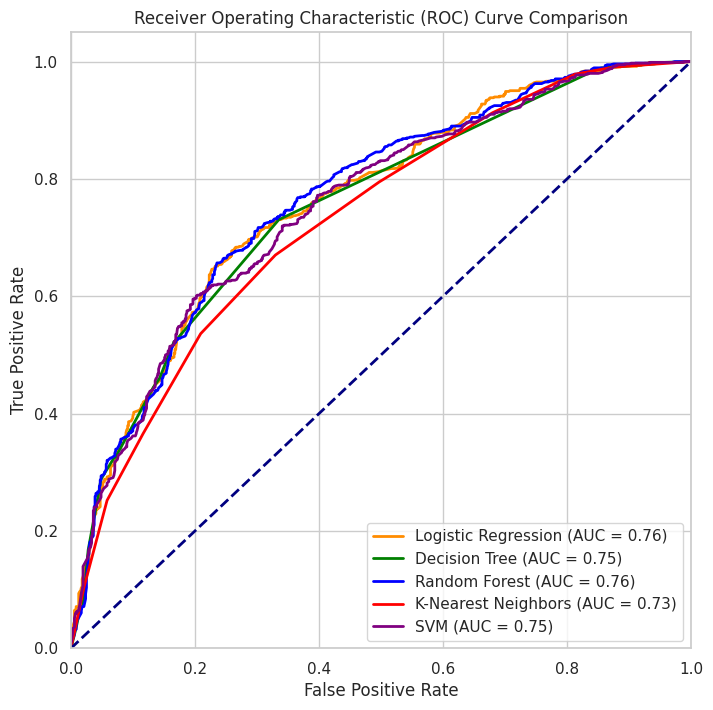

In [113]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Create an SVM classifier
svm_model = SVC(probability=True) # probability=True to get probabilities for ROC curve

# Train the model
svm_model.fit(X_train1, y_train1)

# Make predictions
predict_svm = svm_model.predict(X_test1)

# Evaluate the model
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test1, predict_svm))

print("\nAccuracy Score (SVM):")
print(accuracy_score(y_test1, predict_svm))

print("\nClassification Report (SVM):")
print(classification_report(y_test1, predict_svm))


# Get predicted probabilities for each best model from GridSearchCV
y_prob_logreg = best_logreg_model.predict_proba(X_test1)[:, 1]
y_prob_tree = best_tree_model.predict_proba(X_test1)[:, 1]
y_prob_rf = best_rf_model.predict_proba(X_test1)[:, 1]
y_prob_knn = best_knn_model.predict_proba(X_test1)[:, 1]
y_prob_svm = svm_model.predict_proba(X_test1)[:, 1]


# Calculate ROC curve and AUC for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test1, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_tree, tpr_tree, _ = roc_curve(y_test1, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_rf, tpr_rf, _ = roc_curve(y_test1, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test1, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm, tpr_svm, _ = roc_curve(y_test1, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='K-Nearest Neighbors (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()

### Visualizing Classification Model Results

Besides the ROC curve, we can visualize the confusion matrix for each classification model to see how well it's performing in terms of true positives, true negatives, false positives, and false negatives.

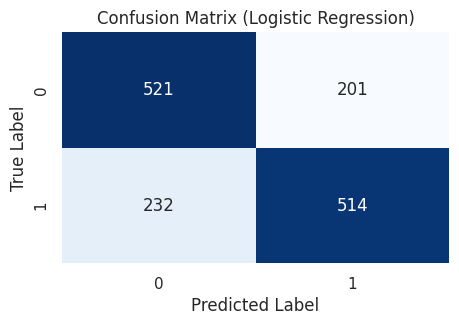

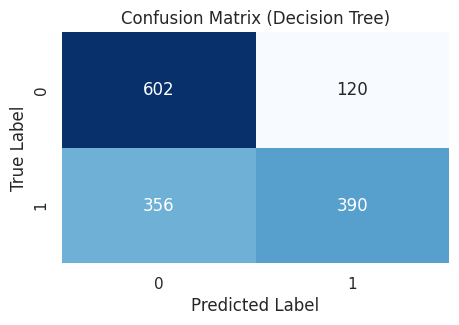

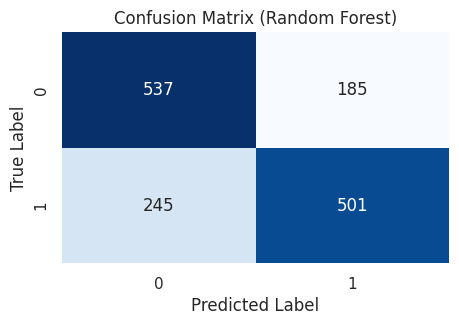

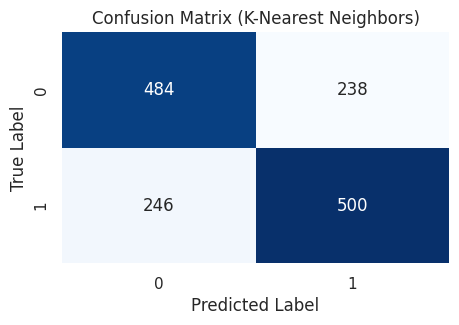

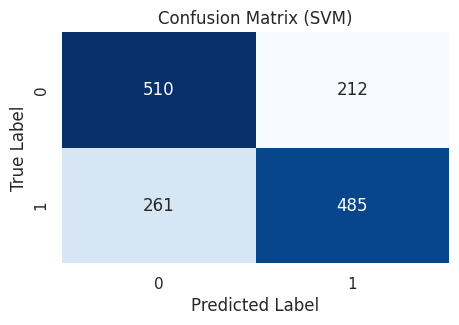

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

# Plot confusion matrix for each classification model
plot_confusion_matrix(y_test1, best_logreg_model.predict(X_test1), 'Logistic Regression')
plot_confusion_matrix(y_test1, best_tree_model.predict(X_test1), 'Decision Tree')
plot_confusion_matrix(y_test1, best_rf_model.predict(X_test1), 'Random Forest')
plot_confusion_matrix(y_test1, best_knn_model.predict(X_test1), 'K-Nearest Neighbors')
plot_confusion_matrix(y_test1, svm_model.predict(X_test1), 'SVM')

# **Conclusion**
Based on the analysis, job title and state are significant factors influencing salary, with California showing higher average salaries. While a simple linear model provides a baseline for salary prediction, more complex models might capture the nuances better. The classification models demonstrate reasonable accuracy in predicting salary satisfaction, with Logistic Regression and Random Forest performing slightly better.